## Import modules

In [1]:
import os
import sys
sys.path.insert(0, "../") # uncomment to work with local copy
import diffusive_solver as df
print(df.__version__)
from diffusive_solver import * 

3.0rc8


## Load a simple geometry

In [2]:
output_folder = 'testing_results'
geometry = Geometry.from_txt_file(filename = 'geometry_files/rectangle.txt', 
                                  resolution = 20)

## Check mesh and boundary markers

Total volume = 5.999999999999998
Total area = 14.0
Contact 1 with area = 1.0
Contact 2 with area = 1.0


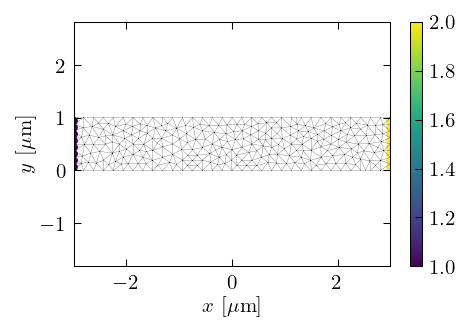

In [3]:
plt.figure()
geometry.plot()
plt.colorbar()
plt.xlabel(r'$x~[{\rm \mu m}]$')
plt.ylabel(r'$y~[{\rm \mu m}]$')

geometry.check_dimensions()

## Define problem

In [4]:
problem = Problem(geometry = geometry,  
                  contact_resistances = [[1, 1]],
                  biases = [[1.,0.]])

## Compute FEM solution

In [5]:
problem.solve()

## Plot solution

(<matplotlib.collections.PolyCollection at 0x7fe620336cd0>,
  <matplotlib.lines.Line2D at 0x7fe6202f5df0>])

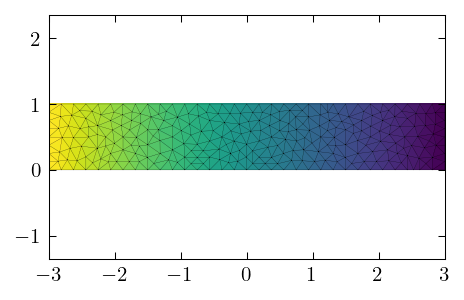

In [6]:
plt.axis('equal')
problem.plot_field(field = 0)

## Calculate derived quantities

In [7]:
problem.fluxes 

array([[-0.125,  0.125]])

In [8]:
problem.response_matrix

array([[[[-0.125,  0.125]],

        [[ 0.125, -0.125]]]])

In [9]:
problem.save(output_folder +'/rectangle')

In [10]:
np.tensordot(problem.response_matrix, problem.biases, axes =2)

array([[-0.125,  0.125]])